In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import csv
import os

In [3]:
%matplotlib inline

In [5]:
log_dicts = sorted(glob.glob('./RD_mol*/'), key= lambda x:int(x.split('_')[-1].split('/')[0]))

In [6]:
def skip_last(iterator):
    prev = next(iterator)
    for item in iterator:
        yield prev
        prev = item

In [7]:
def read_to_dict(file_name):
    res_dict = {}
    keym = {}
    with open(file_name, newline='') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=',')
        for i, row in enumerate(skip_last(csv_reader)):
            if i == 0:
                for j, rr in enumerate(row):
                    res_dict[rr] = []
                    keym[j] = rr
            else:
                for j, rr in enumerate(row):
                    res_dict[keym[j]].append(float(rr))
    return res_dict

In [8]:
def read_to_dict2(file_name):
    lines = open(file_name).read().split('\n')[1:-1]
    res = {'epoch':[], 'acc':[]}
    for i,ll in enumerate(lines):
        try:
            ep = int(ll.split(',')[0])
            aca = float(ll.split(',')[1])
        except:
            print(i)
            continue
        res['epoch'].append(ep)
        res['acc'].append(aca)
    return res

In [12]:
tip = {}

i = 0

bs_lr = {32: [1e-3, 5e-4],
         64: [1e-3]}

bs_ng = {32: [32], 64: [32, 64]}

bs_epo = {32:250, 64:250, 128:250}

for prob in ['ogb-molpcba']:
    for bs in [32, 64]:
        for lr in bs_lr[bs]:
            for dire in ["False"]:
                for samp in ["False"]:
                    for ng in bs_ng[bs]:
                        for wg in [-1, 40]:
                            for rd_t in range(4):
                                tip[i] = ( bs,lr, ng, wg, rd_t)
                                i+=1
                                


In [14]:
train_res_dict = {}
val_res_dict = {}
test_res_dict = {}
in_test_res_dict = {}

for logd in log_dicts:
    keym = {}
    print(logd)
    #train_res_dict[logd] = read_to_dict('{}train_algo.csv'.format(logd))
    #val_res_dict[logd] = read_to_dict('{}val_eval.csv'.format(logd))
    test_res_dict[logd] = read_to_dict('{}test_eval.csv'.format(logd))
    in_test_res_dict[logd] = read_to_dict('{}train_eval.csv'.format(logd))

./RD_mol_0/
./RD_mol_1/
./RD_mol_2/
./RD_mol_3/
./RD_mol_4/
./RD_mol_5/
./RD_mol_6/
./RD_mol_7/
./RD_mol_8/
./RD_mol_9/
./RD_mol_10/
./RD_mol_11/
./RD_mol_12/
./RD_mol_13/
./RD_mol_14/
./RD_mol_15/
./RD_mol_16/
./RD_mol_17/
./RD_mol_18/
./RD_mol_19/
./RD_mol_20/
./RD_mol_21/
./RD_mol_22/
./RD_mol_23/
./RD_mol_24/
./RD_mol_25/
./RD_mol_26/
./RD_mol_27/
./RD_mol_28/
./RD_mol_29/
./RD_mol_30/
./RD_mol_31/


In [ ]:
( bs,lr, ng, wg, rd_t)

./RD_mol_0/ 0
./RD_mol_1/ 1
./RD_mol_2/ 2
./RD_mol_3/ 3
./RD_mol_4/ 4
./RD_mol_5/ 5
./RD_mol_6/ 6
./RD_mol_7/ 7
./RD_mol_8/ 8
./RD_mol_9/ 9
./RD_mol_10/ 10
./RD_mol_11/ 11
./RD_mol_12/ 12
./RD_mol_13/ 13
./RD_mol_14/ 14
./RD_mol_15/ 15
./RD_mol_16/ 16
./RD_mol_17/ 17
./RD_mol_18/ 18
./RD_mol_19/ 19
./RD_mol_20/ 20
./RD_mol_21/ 21
./RD_mol_22/ 22
./RD_mol_23/ 23
./RD_mol_24/ 24
./RD_mol_25/ 25
./RD_mol_26/ 26
./RD_mol_27/ 27
./RD_mol_28/ 28
./RD_mol_29/ 29
./RD_mol_30/ 30
./RD_mol_31/ 31


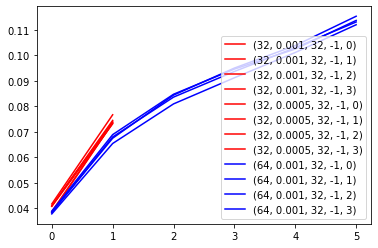

In [27]:
for i,logd in enumerate(test_res_dict):
    print(logd, i)
    if tip[i][0]==64 and tip[i][2]==64:
        continue
    if tip[i][3] == 40:
        continue
    if tip[i][0] == 32:
        colo = 'r'
    else:
        colo = 'b'
    plt.plot(in_test_res_dict[logd]['epoch'], in_test_res_dict[logd]['ap'], c=colo, label="{}".format(tip[i]))
plt.legend()

./RD_mol_0/ 0
./RD_mol_1/ 1
./RD_mol_2/ 2
./RD_mol_3/ 3
./RD_mol_4/ 4
./RD_mol_5/ 5
./RD_mol_6/ 6
./RD_mol_7/ 7
./RD_mol_8/ 8
./RD_mol_9/ 9
./RD_mol_10/ 10
./RD_mol_11/ 11
./RD_mol_12/ 12
./RD_mol_13/ 13
./RD_mol_14/ 14
./RD_mol_15/ 15
./RD_mol_16/ 16
./RD_mol_17/ 17
./RD_mol_18/ 18
./RD_mol_19/ 19
./RD_mol_20/ 20
./RD_mol_21/ 21
./RD_mol_22/ 22
./RD_mol_23/ 23
./RD_mol_24/ 24
./RD_mol_25/ 25
./RD_mol_26/ 26
./RD_mol_27/ 27
./RD_mol_28/ 28
./RD_mol_29/ 29
./RD_mol_30/ 30
./RD_mol_31/ 31


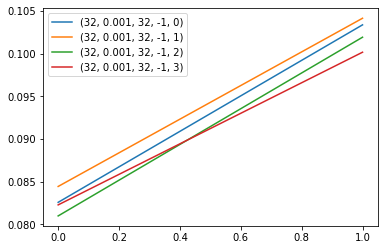

In [48]:
for i,logd in enumerate(test_res_dict):
    print(logd, i)
    if tip[i][1]==5e-4:
        continue
    if tip[i][0]==64:
        continue
    if tip[i][3] == 40:
        continue
    if tip[i][1] == 1e-3:
        colo = 'r'
    elif tip[i][1] == 5e-4:
        colo = 'b'
    elif tip[i][4] == 2:
        colo = 'g'
    else:
        colo = 'c'
    plt.plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['ap'], label="{}".format(tip[i]))
plt.legend()

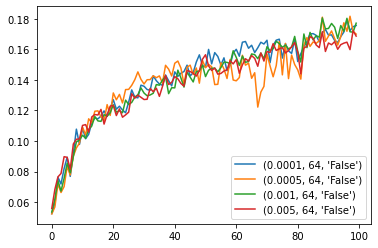

In [66]:
for i,logd in enumerate(train_res_dict):
    if i < 16:
        conf = tip[i]
    else:
        conf = tip[i+4]
    if conf[2] == 'True':
        continue
    if conf[1] in [32,128]:
        continue
    colo = ["r","g","b"][[32,64,128].index(conf[1])]
    plt.plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['ap'], label=conf)
plt.legend()

No handles with labels found to put in legend.


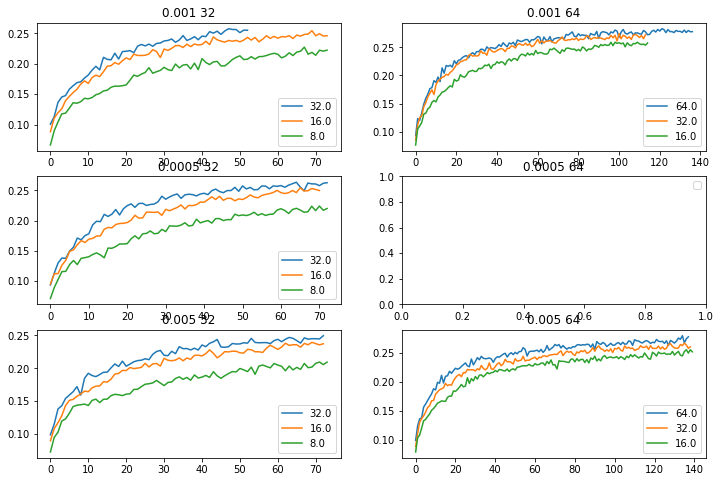

In [21]:
fig, axs = plt.subplots(3, 2, figsize=(12,8))
for i,logd in enumerate(in_test_res_dict):
    bs, lr, bp = params[logd]
    loc0 = [1e-3, 5e-4, 5e-3].index(lr)
    loc1 = [32,64].index(bs)
    loc2 = [1,2,4].index(bp)
    axs[loc0,loc1].plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['ap'], label=bs/bp)
for x in range(3):
    for y in range(2):
        xs = [1e-3, 5e-4, 5e-3][x]
        ys = [32,64][y]
        #zs = [1,2,4][y]
        axs[x,y].legend()
        axs[x,y].set_title("{} {}".format(xs,ys))

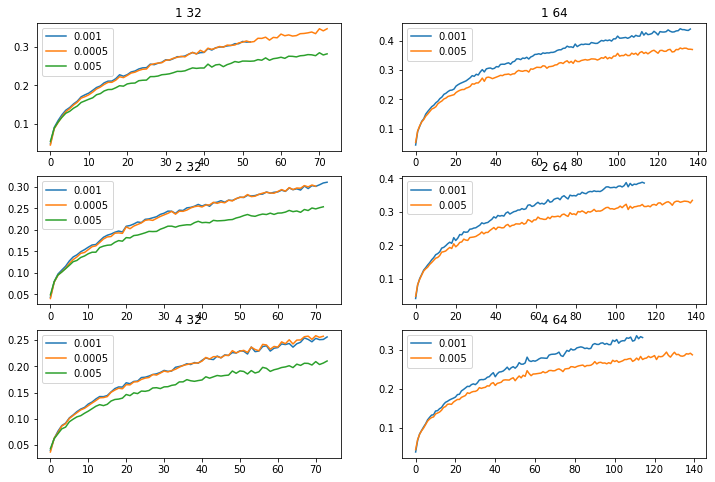

In [23]:
fig, axs = plt.subplots(3, 2, figsize=(12,8))
for i,logd in enumerate(in_test_res_dict):
    bs, lr, bp = params[logd]
    loc0 = [1e-3, 5e-4, 5e-3].index(lr)
    loc1 = [32,64].index(bs)
    loc2 = [1,2,4].index(bp)
    axs[loc2,loc1].plot(in_test_res_dict[logd]['epoch'], in_test_res_dict[logd]['ap'], label=lr)
for x in range(3):
    for y in range(2):
        #xs = [1e-3, 5e-4, 5e-3][x]
        ys = [32,64][y]
        zs = [1,2,4][x]
        axs[x,y].legend()
        axs[x,y].set_title("{} {}".format(zs,ys))

In [13]:
test_res_dict[logd].keys()

dict_keys(['epoch', 'acc_avg', 'recall-macro_all', 'F1-macro_all'])

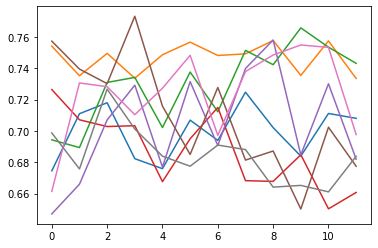

In [20]:
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    if loc0==2:
        continue
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    plt.plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['acc_avg'], label=str(tip[alg]))
#plt.legend()

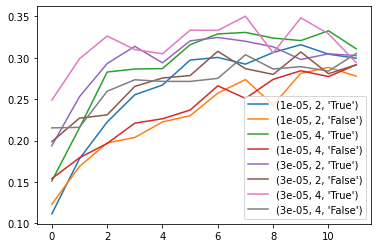

In [22]:
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    if loc0==2:
        continue
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    plt.plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['F1-macro_all'], label=str(tip[alg]))
plt.legend()

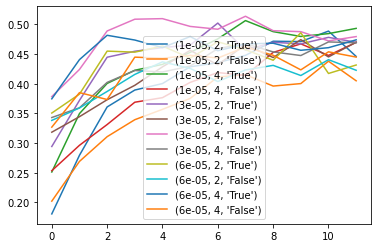

In [23]:
for i,logd in enumerate(train_res_dict):
    alg = logd.split('/')[-2]
    loc0 = [1e-5, 3e-5, 6e-5].index(tip[alg][0])
    loc1 = [2, 4].index(tip[alg][1])
    loc2 = ["True", "False"].index(tip[alg][2])
    plt.plot(in_test_res_dict[logd]['epoch'], in_test_res_dict[logd]['F1-macro_all'], label=str(tip[alg]))
plt.legend()